DataGeneration class

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class DataGeneration:
    
    def __init__(self,name, file_path, seperation_rate):
        
        self.name = name
        self.file_path = file_path
        self.seperation_rate = seperation_rate
        
    def generate(self):
        
        try:
            loaded_data = np.loadtxt(self.file_path,delimiter=',',dtype=np.float32)
            
        except Exception as err:
            print("[DataGeneration::generate()]", str(err))
            raise Exception(str(err))
        
        print("[Data Generation] loaded_data.shape = ",loaded_data.shape)
        
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data)*self.seperation_rate)
        
        np.random.shuffle(loaded_data)
        
        test_data = loaded_data[0:test_data_num]
        training_data = loaded_data[test_data_num: ]
        
        return training_data, test_data

분리비율 30%

In [ ]:
seperation_rate = 0.3

try:
    data_obj1 = DataGeneration("Diabetes","./../(200309)diabetes.csv",seperation_rate)
    
    (generated_training_data, generated_test_data) = data_obj1.generate()
    
    print("generated_training_data.shape = ", generated_training_data.shape)
    print("generated_test_data.shape = ",generated_test_data.shape)
    
except Exception as err:
    print("Exception Occur!!!")
    print(str(err))

분리비율 50%

In [ ]:
seperation_rate = 0.5

try:
    data_obj2 = DataGeneration("Diabetes","./../(200309)diabetes.csv",seperation_rate)
    
    (generated_training_data, generated_test_data) = data_obj2.generate()
    
    print("generated_training_data.shape = ",generated_training_data.shape)
    print("generated_test_data.shape = ",generated_test_data.shape)
except Exception as err:
    print("Exception Occur!!")
    print(str(err))

### DIabetes 완성본

In [2]:
# 수치미분 함수

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [39]:
class Diabetes:
    
    def __init__(self,i_node,h_node,o_node,lr):
        
        
        self.W2 = np.random.rand(i_node,h_node)
        self.b2 = np.random.rand(h_node)
        
        self.W3 = np.random.rand(h_node,o_node)
        self.b3 = np.random.rand(o_node)
        
        self.learning_rate = lr
        
    def feed_forward(self):
        
        delta = 1e-7
        
        z2 = np.dot(self.input_data,self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2,self.W3) + self.b3
        y = a3 = sigmoid(z3)
        
        return -np.sum(self.target_data*np.log(y+delta) + (1-self.target_data)*np.log((1-y)+delta))
    
    def predict(self,testdata):
        
        delta = 1e-7
        
        z2 = np.dot(testdata,self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2,self.W3) + self.b3
        y = a3 = sigmoid(z3)
        
        if y >= 0.5:
            result = 1
        else:
            result = 0
        
        return y, result
    
    def accuracy(self,test_xdata,test_tdata):
        
        matched_list = []
        unmatched_list = []
        
        for i in range(len(test_xdata)):
            (real_val, logistic_val) = self.predict(test_xdata[i])
            if logistic_val == test_tdata[i]:
                matched_list.append(i)
            else:
                unmatched_list.append(i)
        
        accuracy_ret =  len(matched_list)/len(test_xdata)
        
        print("accuracy ret = ",accuracy_ret)
        
        return unmatched_list, accuracy_ret
        
        
    def train(self, input_data, target_data):
        
        self.input_data = input_data
        self.target_data = target_data
        
        f = lambda x : self.feed_forward()
        
        self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
    
        self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)
        
        self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)
    
        self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)

In [40]:
class DataGeneration:
    
    def __init__(self,name, file_path, seperation_rate):
        self.name = name
        self.file_path = file_path
        self.seperation_rate = seperation_rate
    
    def generate(self):
        
        loaded_data = np.loadtxt(self.file_path,delimiter=',',dtype=np.float32)
        
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data)*self.seperation_rate)
        
        np.random.shuffle(loaded_data)
        
        generated_test_data = loaded_data[ :test_data_num]
        generated_training_data = loaded_data[test_data_num: ]
        
        return generated_training_data, generated_test_data        

test_data 30% / training_data 70%

In [41]:
data_obj = DataGeneration("Diabetes", "./../(200309)diabetes.csv",0.2)
(training_data,test_data,) = data_obj.generate()

print("test_data.shape = ",test_data.shape,",training_data.shape = ",training_data.shape)

test_data.shape =  (151, 9) ,training_data.shape =  (608, 9)


In [42]:
i_node = training_data.shape[1] - 1
h_node = 10
o_node = 1

lr = 1e-2
epochs = 20

loss_val_list = []
accuracy_val_list = []
validataion_accuracy_val_list = []

Diabetes_obj1 = Diabetes(i_node,h_node,o_node,lr)

for step in range(epochs):
    
    for i in range(len(training_data)):
        
        input_data = training_data[i:, 0:-1]
        target_data = training_data[i:, [-1]]
        
        Diabetes_obj1.train(input_data,target_data)
        
    cur_loss_val = Diabetes_obj1.feed_forward()
    loss_val_list.append(cur_loss_val)
    
    print("Step = ",step +1, "loss value = ",Diabetes_obj1.feed_forward())

Step =  1 loss value =  0.09116056324116702
Step =  2 loss value =  0.10025506347604048
Step =  3 loss value =  0.10788620784578433
Step =  4 loss value =  0.08160170871371356
Step =  5 loss value =  0.05877249553163827
Step =  6 loss value =  0.04635252219448827
Step =  7 loss value =  0.05132771940759112
Step =  8 loss value =  0.07428395557309622
Step =  9 loss value =  0.08505203555434064
Step =  10 loss value =  0.08540154472265796
Step =  11 loss value =  0.08580536722125003
Step =  12 loss value =  0.085150253954433
Step =  13 loss value =  0.0837048142903033
Step =  14 loss value =  0.08214802819671024
Step =  15 loss value =  0.08456760499735778
Step =  16 loss value =  0.11741524947218927
Step =  17 loss value =  0.10144276091767498
Step =  18 loss value =  0.0875341457317902
Step =  19 loss value =  0.08153492784503591
Step =  20 loss value =  0.07826951859973355


In [43]:
test_input_data = test_data[:,:-1]
test_target_data = test_data[:,[-1]]

(false_list, accuracy_ret) = Diabetes_obj1.accuracy(test_input_data,test_target_data)
print("Test Data Accuracy = ",np.round(accuracy_ret,3))

accuracy ret =  0.7350993377483444
Test Data Accuracy =  0.735


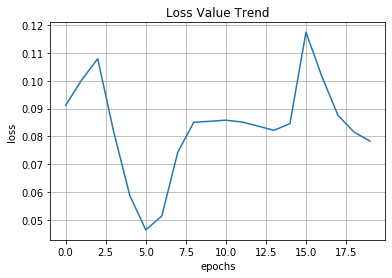

In [44]:
plt.title("Loss Value Trend")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(loss_val_list)
plt.show()

test_data 20% training_data 80%

In [46]:
Diabetes_obj2_data = DataGeneration("Diabetes","./../(200309)diabetes.csv",0.2)

(training_data,test_data) = Diabetes_obj2_data.generate()

print("training_data.shape = ",training_data.shape, "test_data.shape = ",test_data.shape)

training_data.shape =  (608, 9) test_data.shape =  (151, 9)


In [47]:
i_node = training_data.shape[1]-1
h_node = 10
o_node = 1

lr = 1e-4
epochs = 20

loss_val_list = []

Diabetes_obj2 = Diabetes(i_node,h_node,o_node,lr)

for step in range(epochs):
    
    for i in range(len(training_data)):
        
        input_data = training_data[i,:-1]
        target_data = training_data[i,[-1]]
        
        Diabetes_obj2.train(input_data,target_data)
        
    print("step = ",step+1, Diabetes_obj2.feed_forward())
    cur_val = Diabetes_obj2.feed_forward()
    loss_val_list.append(cur_val)       

step =  1 0.1186599724748191
step =  2 0.1242734731417994
step =  3 0.13002830158724138
step =  4 0.1359198668178661
step =  5 0.14194303927625507
step =  6 0.14809216338084405
step =  7 0.15436107462189522
step =  8 0.16074312117238146
step =  9 0.1672311899016856
step =  10 0.17381773660855313
step =  11 0.18049482021928354
step =  12 0.1872541406298454
step =  13 0.19408707980823725
step =  14 0.20098474571757627
step =  15 0.20793801857281946
step =  16 0.21493759890585173
step =  17 0.2219740568861551
step =  18 0.22903788232791783
step =  19 0.23611953480972703
step =  20 0.24320949333982717


In [48]:
test_input_data = test_data[:,:-1]
test_target_data = test_data[:,[-1]]

(f,accuracy_ret)=Diabetes_obj2.accuracy(test_input_data,test_target_data)

accuracy ret =  0.6357615894039735


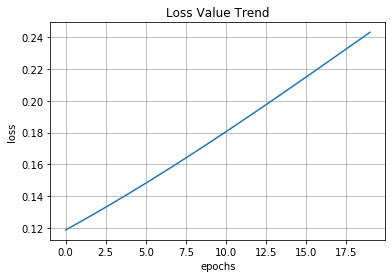

In [49]:
plt.title("Loss Value Trend")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(loss_val_list)
plt.show()